Font Size: 36, Percentage: 0.24%
Font Size: 12, Percentage: 13.88%
Font Size: 24, Percentage: 48.79%
Font Size: 20, Percentage: 35.99%
Font Size: 18, Percentage: 0.76%
Font Size: 40, Percentage: 0.08%
Font Size: 54, Percentage: 0.05%
Font Size: 44, Percentage: 0.21%


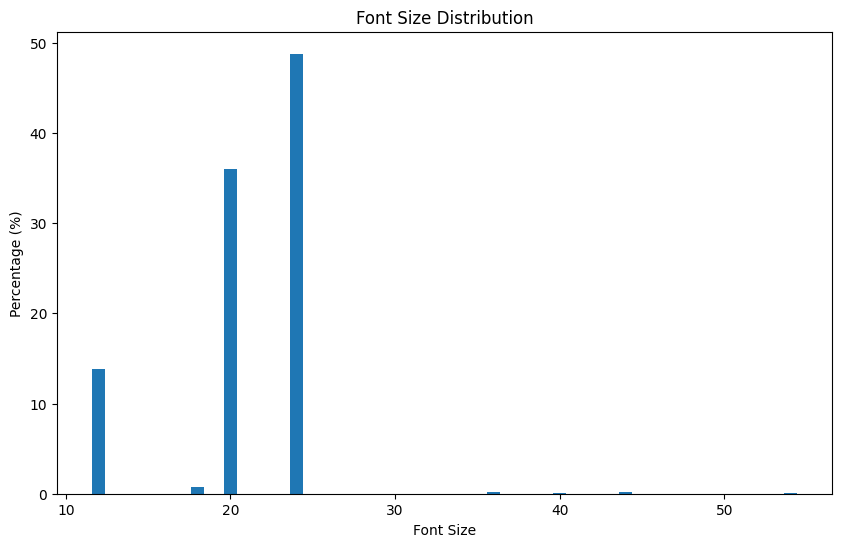

In [3]:
import pdfplumber
from collections import Counter
import matplotlib.pyplot as plt

def get_cumulative_font_sizes(pdf_path, decimal_places=2):
    font_sizes = []

    with pdfplumber.open(pdf_path) as pdf:
        total_chars = 0

        for page in pdf.pages:
            for char in page.chars:
                font_size = round(char['size'])
                font_sizes.append(font_size)
                total_chars += 1

    font_size_counts = Counter(font_sizes)
    font_size_percentages = {size: count / total_chars * 100 for size, count in font_size_counts.items()}
    for font_size, percentage in font_size_percentages.items():
      print(f"Font Size: {font_size}, Percentage: {percentage:.2f}%")

    return font_size_percentages

pdf_path = 'pdf1.pdf'
decimal_places = 2
font_size_percentages = get_cumulative_font_sizes(pdf_path, decimal_places)
font_sizes, percentages = zip(*font_size_percentages.items())
plt.figure(figsize=(10, 6))
plt.bar(font_sizes, percentages)
plt.xlabel('Font Size')
plt.ylabel('Percentage (%)')
plt.title('Font Size Distribution')
plt.show()



In [1]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.7 MB/s eta 0:00:00


Font Size: 36.02, Percentage: 0.24%
Font Size: 11.88, Percentage: 13.88%
Font Size: 24.14, Percentage: 41.61%
Font Size: 24.12, Percentage: 7.18%
Font Size: 20.18, Percentage: 20.21%
Font Size: 20.16, Percentage: 15.78%
Font Size: 18.02, Percentage: 0.63%
Font Size: 39.98, Percentage: 0.08%
Font Size: 54.05, Percentage: 0.05%
Font Size: 43.94, Percentage: 0.21%
Font Size: 18.0, Percentage: 0.13%


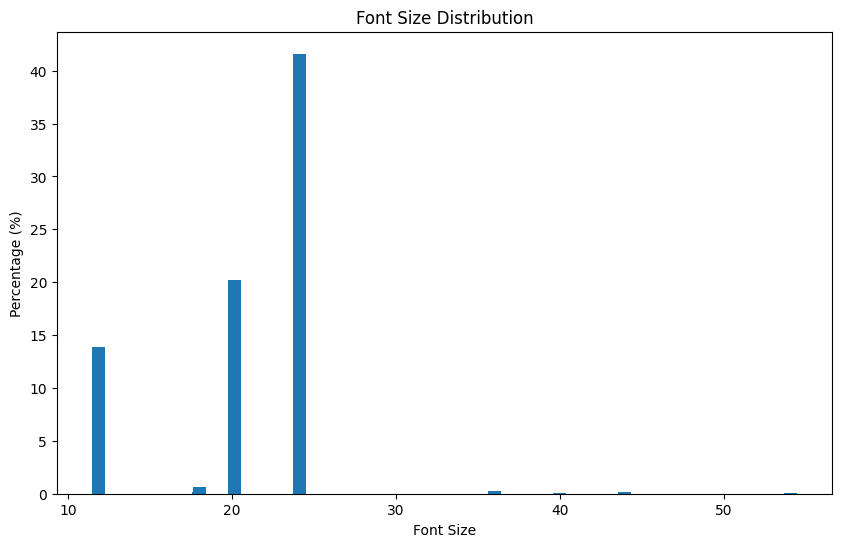

In [13]:
#Bugs Plot considerations and decimal places
import pdfplumber
from collections import Counter
import matplotlib.pyplot as plt

def get_cumulative_font_sizes(pdf_path, decimal_places=2):
    font_sizes = []

    try:
        with pdfplumber.open(pdf_path) as pdf:
            total_chars = 0

            for page in pdf.pages:
                for char in page.chars:
                    font_size = round(char['size'], decimal_places)
                    font_sizes.append(font_size)
                    total_chars += 1

        font_size_counts = Counter(font_sizes)
        font_size_percentages = {size: count / total_chars * 100 for size, count in font_size_counts.items()}

        for font_size, percentage in font_size_percentages.items():
            print(f"Font Size: {font_size}, Percentage: {percentage:.{decimal_places}f}%")

        return font_size_percentages

    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
        return None
    except Exception as e:
        print(f"Error: {e}")
        return None

pdf_path = 'pdf1.pdf'
decimal_places = 2
font_size_percentages = get_cumulative_font_sizes(pdf_path, decimal_places)

if font_size_percentages:
    font_sizes, percentages = zip(*font_size_percentages.items())
    plt.figure(figsize=(10, 6))
    plt.bar(font_sizes, percentages)
    plt.xlabel('Font Size')
    plt.ylabel('Percentage (%)')
    plt.title('Font Size Distribution')
    plt.show()


In [12]:
#Bug Memory usage
import pdfplumber
from collections import Counter

def get_cumulative_font_sizes(pdf_path, decimal_places=2):
    font_size_counts = Counter()
    total_chars = 0

    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                for char in page.chars:
                    font_size = round(char['size'], decimal_places)
                    font_size_counts[font_size] += 1
                    total_chars += 1

        font_size_percentages = {size: count / total_chars * 100 for size, count in font_size_counts.items()}

        for font_size, percentage in font_size_percentages.items():
            print(f"Font Size: {font_size:.{decimal_places}f}, Percentage: {percentage:.{decimal_places}f}%")

        return font_size_percentages

    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
        return None
    except Exception as e:
        print(f"Error: {e}")
        return None

pdf_path = 'pdf1.pdf'
decimal_places = 2
font_size_percentages = get_cumulative_font_sizes(pdf_path, decimal_places)


Font Size: 36.02, Percentage: 0.24%
Font Size: 11.88, Percentage: 13.88%
Font Size: 24.14, Percentage: 41.61%
Font Size: 24.12, Percentage: 7.18%
Font Size: 20.18, Percentage: 20.21%
Font Size: 20.16, Percentage: 15.78%
Font Size: 18.02, Percentage: 0.63%
Font Size: 39.98, Percentage: 0.08%
Font Size: 54.05, Percentage: 0.05%
Font Size: 43.94, Percentage: 0.21%
Font Size: 18.00, Percentage: 0.13%


Font Size: 36.02, Percentage: 0.24%
Font Size: 11.88, Percentage: 13.88%
Font Size: 24.14, Percentage: 41.61%
Font Size: 24.12, Percentage: 7.18%
Font Size: 20.18, Percentage: 20.21%
Font Size: 20.16, Percentage: 15.78%
Font Size: 18.02, Percentage: 0.63%
Font Size: 39.98, Percentage: 0.08%
Font Size: 54.05, Percentage: 0.05%
Font Size: 43.94, Percentage: 0.21%
Font Size: 18.0, Percentage: 0.13%


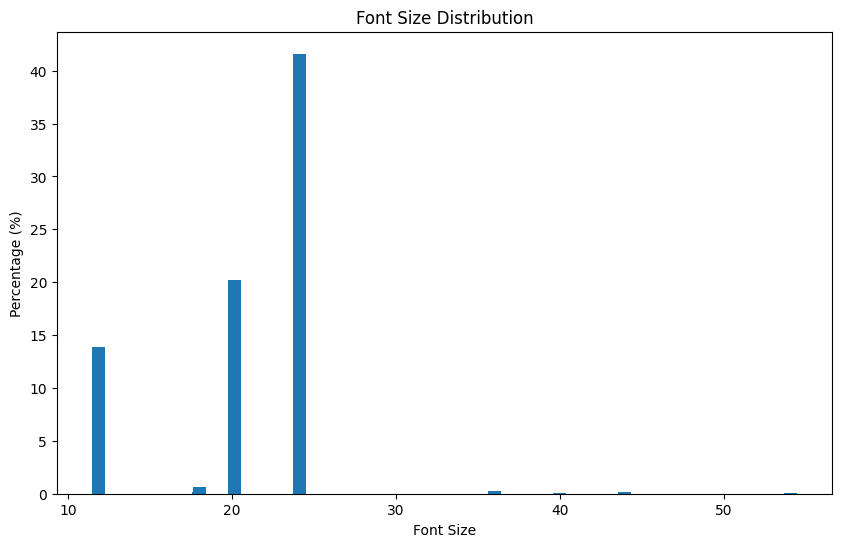

In [11]:
#Consolidate conditional Expression
import pdfplumber
from collections import Counter
import matplotlib.pyplot as plt

def get_cumulative_font_sizes(pdf_path, decimal_places=2):
    font_sizes = []

    with pdfplumber.open(pdf_path) as pdf:
        total_chars = 0

        for page in pdf.pages:
            for char in page.chars:
                font_size = round(char['size'], decimal_places)
                font_sizes.append(font_size)
                total_chars += 1

    font_size_distribution = Counter(font_sizes)
    total_chars = sum(font_size_distribution.values())
    font_size_distribution = {size: count / total_chars * 100 for size, count in font_size_distribution.items()}

    for font_size, percentage in font_size_distribution.items():
        print(f"Font Size: {font_size}, Percentage: {percentage:.2f}%")

    return font_size_distribution

pdf_path = 'pdf1.pdf'
decimal_places = 2
font_size_distribution = get_cumulative_font_sizes(pdf_path, decimal_places)
font_sizes, percentages = zip(*font_size_distribution.items())
plt.figure(figsize=(10, 6))
plt.bar(font_sizes, percentages)
plt.xlabel('Font Size')
plt.ylabel('Percentage (%)')
plt.title('Font Size Distribution')
plt.show()


Font Size: 36.02, Percentage: 0.24%
Font Size: 11.88, Percentage: 13.88%
Font Size: 24.14, Percentage: 41.61%
Font Size: 24.12, Percentage: 7.18%
Font Size: 20.18, Percentage: 20.21%
Font Size: 20.16, Percentage: 15.78%
Font Size: 18.02, Percentage: 0.63%
Font Size: 39.98, Percentage: 0.08%
Font Size: 54.05, Percentage: 0.05%
Font Size: 43.94, Percentage: 0.21%
Font Size: 18.0, Percentage: 0.13%


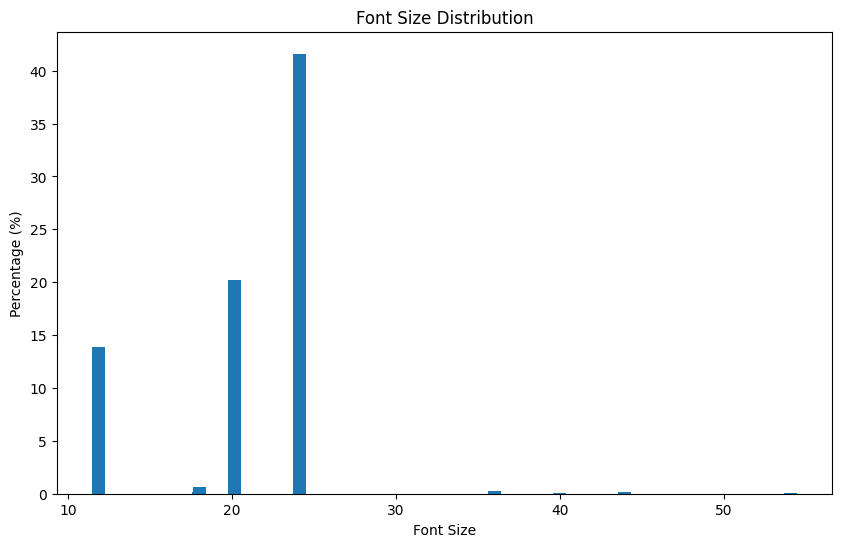

In [10]:
#Refactor encapsulate collection
import pdfplumber
from collections import Counter
import matplotlib.pyplot as plt

class FontSizeData:
    def __init__(self):
        self.font_sizes = []

    def add_font_size(self, size):
        self.font_sizes.append(size)

    def get_font_sizes(self):
        return self.font_sizes

def get_cumulative_font_sizes(pdf_path, decimal_places=2):
    font_size_data = FontSizeData()

    with pdfplumber.open(pdf_path) as pdf:
        total_chars = 0

        for page in pdf.pages:
            for char in page.chars:
                font_size = round(char['size'], decimal_places)
                font_size_data.add_font_size(font_size)
                total_chars += 1

    font_sizes = font_size_data.get_font_sizes()
    font_size_counts = Counter(font_sizes)
    total_chars = sum(font_size_counts.values())
    font_size_distribution = {size: count / total_chars * 100 for size, count in font_size_counts.items()}

    for font_size, percentage in font_size_distribution.items():
        print(f"Font Size: {font_size}, Percentage: {percentage:.2f}%")

    return font_size_distribution

pdf_path = 'pdf1.pdf'
decimal_places = 2
font_size_distribution = get_cumulative_font_sizes(pdf_path, decimal_places)
font_sizes, percentages = zip(*font_size_distribution.items())
plt.figure(figsize=(10, 6))
plt.bar(font_sizes, percentages)
plt.xlabel('Font Size')
plt.ylabel('Percentage (%)')
plt.title('Font Size Distribution')
plt.show()


Font Size: 36.02, Percentage: 0.24%
Font Size: 11.88, Percentage: 13.88%
Font Size: 24.14, Percentage: 41.61%
Font Size: 24.12, Percentage: 7.18%
Font Size: 20.18, Percentage: 20.21%
Font Size: 20.16, Percentage: 15.78%
Font Size: 18.02, Percentage: 0.63%
Font Size: 39.98, Percentage: 0.08%
Font Size: 54.05, Percentage: 0.05%
Font Size: 43.94, Percentage: 0.21%
Font Size: 18.0, Percentage: 0.13%


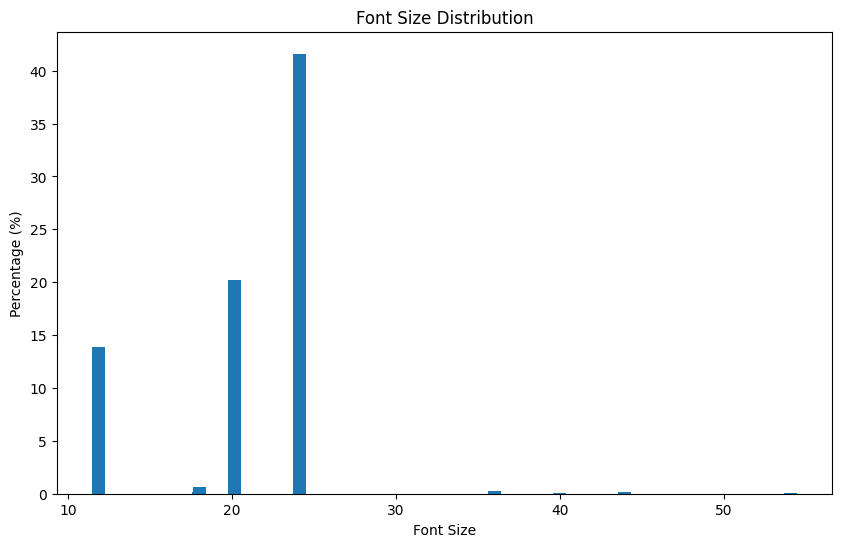

In [9]:
#Refactor replace literal
import pdfplumber
from collections import Counter
import matplotlib.pyplot as plt

TOTAL_PERCENTAGE = 100

def get_cumulative_font_sizes(pdf_path, decimal_places=2):
    font_sizes = []

    with pdfplumber.open(pdf_path) as pdf:
        total_chars = 0

        for page in pdf.pages:
            for char in page.chars:
                font_size = round(char['size'], decimal_places)
                font_sizes.append(font_size)
                total_chars += 1

    font_size_counts = Counter(font_sizes)
    total_chars = sum(font_size_counts.values())
    font_size_distribution = {size: count / total_chars * TOTAL_PERCENTAGE for size, count in font_size_counts.items()}

    for font_size, percentage in font_size_distribution.items():
        print(f"Font Size: {font_size}, Percentage: {percentage:.2f}%")

    return font_size_distribution

pdf_path = 'pdf1.pdf'
decimal_places = 2
font_size_distribution = get_cumulative_font_sizes(pdf_path, decimal_places)
font_sizes, percentages = zip(*font_size_distribution.items())
plt.figure(figsize=(10, 6))
plt.bar(font_sizes, percentages)
plt.xlabel('Font Size')
plt.ylabel('Percentage (%)')
plt.title('Font Size Distribution')
plt.show()
